## REGRESSION LINEAIRE EVOLUTION DU MODELE AVEC LE TEMPS

In [1]:
# Chargement de numpy
import numpy as np
# dataset génération aléatoire avec sklearn.make_regression
from sklearn.datasets import make_regression
# pour les graphiques
import matplotlib.pyplot as plt

### 1. DATASET

In [2]:
# dataset génération aléatoire avec sklearn.make_regression
# avec vecteur Y, matrice X et vecteur teta
x, y = make_regression(n_samples=100, n_features=1, noise=10)

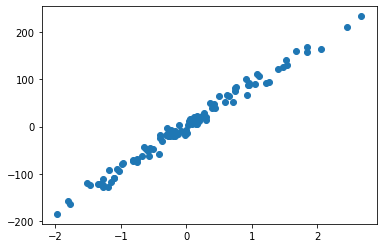

In [3]:
# visualiser y en fonction de x
plt.scatter(x, y)
plt.show()

#### GESTION DU VECTEUR Y

In [4]:
# Vérification des dimensions de la matrice
print(x.shape) # 100 lignes, 1 colonne
print(y.shape) # 100 lignes, rien : dimension incomplète ==> la compléter reshape()

(100, 1)
(100,)


In [5]:
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


#### GESTION DE LA MATRICE X

In [6]:
# il nous faut une colonne X avec une colonne de biais : hstack
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

In [7]:
X

array([[-1.00073968e-03,  1.00000000e+00],
       [-2.77234956e-01,  1.00000000e+00],
       [ 3.95649116e-01,  1.00000000e+00],
       [-8.20517094e-01,  1.00000000e+00],
       [-1.27622142e+00,  1.00000000e+00],
       [ 1.10833068e+00,  1.00000000e+00],
       [-4.01121116e-01,  1.00000000e+00],
       [ 1.47774362e+00,  1.00000000e+00],
       [ 7.55641285e-02,  1.00000000e+00],
       [-5.12237477e-01,  1.00000000e+00],
       [ 9.06824790e-01,  1.00000000e+00],
       [ 2.39242773e-01,  1.00000000e+00],
       [ 2.72661725e-01,  1.00000000e+00],
       [ 7.38388741e-01,  1.00000000e+00],
       [-1.28035097e+00,  1.00000000e+00],
       [-2.52163380e-01,  1.00000000e+00],
       [-2.41460024e-01,  1.00000000e+00],
       [-5.77004462e-01,  1.00000000e+00],
       [-2.91216206e-01,  1.00000000e+00],
       [-1.23661282e-01,  1.00000000e+00],
       [-5.47887957e-01,  1.00000000e+00],
       [-1.10894487e+00,  1.00000000e+00],
       [-1.77715950e+00,  1.00000000e+00],
       [ 6.

### GESTION DU VECTEUR TETA

In [8]:
# teta non connu, on doit initilaiser téta avec des paramètres aléatoires
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

In [9]:
theta # initialisé aléatoirement

array([[0.09716907],
       [0.65385419]])

## 2. MODELE

In [10]:
# modèle linéaire ==> f(x) =X*theta
def model(X,theta):
    return X.dot(theta)

In [11]:
#  le modèle est disponible, on peut l'utiliser
model(X, theta)

array([[0.65375694],
       [0.62691552],
       [0.69229904],
       [0.5741253 ],
       [0.52984494],
       [0.76154964],
       [0.61487762],
       [0.79744516],
       [0.66119668],
       [0.60408055],
       [0.7419695 ],
       [0.67710118],
       [0.68034847],
       [0.72560273],
       [0.52944367],
       [0.6293517 ],
       [0.63039174],
       [0.5977872 ],
       [0.62555698],
       [0.64183813],
       [0.60061642],
       [0.54609905],
       [0.48116925],
       [0.71698326],
       [0.53788437],
       [0.6370068 ],
       [0.7558346 ],
       [0.67015243],
       [0.83255489],
       [0.57484508],
       [0.89180882],
       [0.64627035],
       [0.52977773],
       [0.65865869],
       [0.71135334],
       [0.65203126],
       [0.69691856],
       [0.77212891],
       [0.55165377],
       [0.53922896],
       [0.59065636],
       [0.59413432],
       [0.66200597],
       [0.54624477],
       [0.65853937],
       [0.58098285],
       [0.80305947],
       [0.523

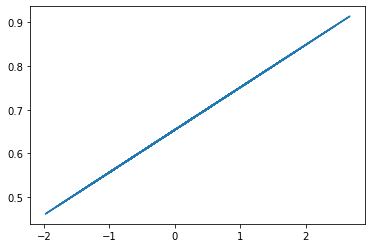

In [12]:
# afficher avec matplotlib les résultats de notre model par rapport au dataset
plt.plot(x, model(X, theta))
plt.show()

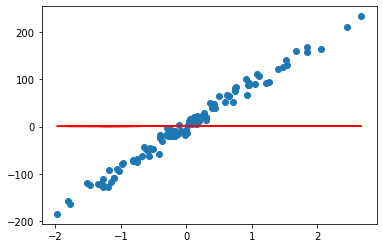

In [13]:
# en comparaison avec le dataset
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')
plt.show() #pas très bon modèle

## 3. FONCTION COUT

In [14]:
#  erreur quadratique moyenne
def fonction_cout(X, y, theta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X, theta)-y)**2)

In [15]:
fonction_cout(X, y, theta) #fort coût car on veut qu'il tende vers 0

3701.5184963111924

## DESCENTE DE GRADIENT

### GESTION DU GRADIENT

In [16]:
# fonction pour calculer le gradient
def gradient(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

### GESTION DE LA DESCENTE DE GRADIENT

In [17]:
# fonction de la descente de gradient itérative
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta) 
    return theta

## 4. ENTRAINEMENT DU MODELE

In [18]:
theta_final = gradient_descente(X, y, theta, learning_rate=0.001, n_iterations=1000)

In [19]:
theta_final

array([[53.69747354],
       [ 1.39986603]])

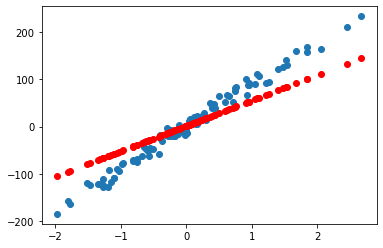

In [30]:
# est-ce que ce vecteur paramètre nous donne une bonne prédictions?
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')
plt.show()
# un peu mieux mais pas suffisant, l'apprentissage n'est pas terminé

In [21]:
# faire continuer l'apprentissage 
#  soit en refait des itérations
# soit on joue sur le learning rate .. .on fait de trop petit pas ==> 0.01.

In [22]:
theta_final_2 = gradient_descente(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [23]:
theta_final_2

array([[89.24792059],
       [ 0.86766806]])

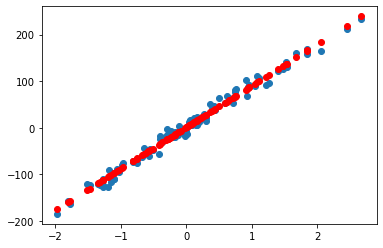

In [31]:
# est-ce que ce vecteur paramètre nous donne une bonne prédictions?
predictions = model(X, theta_final_2)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')
plt.show()
# oui bien meilleur résultat en réentrainant le modèle

## 5. COURBE D'APPRENTISSAGE

## POUR EVOLUTION DU MODELE DANS LE TEMPS ==> MODIFIE GRADIENT

In [36]:
# comment tracer la minimisation de notre fonction coût avec le nombre d'itérations?
def gradient_descente_bis(X, y, theta, learning_rate, n_iterations):
    # tableau rempli de zéro de dimension le nbre d'itérations
    cost_history= np.zeros(n_iterations)
    # ajouter un tableau theta_history initialisé par un tableau de 0 su n_iterations*2
    theta_history = np.zeros((n_iterations, 2))
    for i in range(0, n_iterations):
        theta = theta - learning_rate * gradient(X, y, theta) 
        # on sauvegarde le coût pour chaque itération
        cost_history[i] = fonction_cout(X, y, theta)
        # on sauvegarde le theta pour chaque itération
        theta_history[i,:]= theta.T
    return theta, cost_history, theta_history

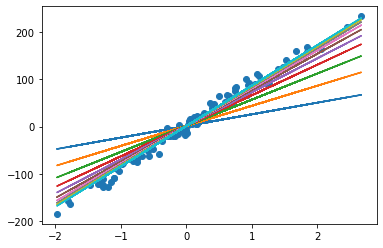

In [39]:
learning_rate=0.3
n_iterations=10

theta_final_2, cost_history, theta_history = gradient_descente_bis(X, y, theta, learning_rate,
                                                                   n_iterations)
predictions = model(X, theta_final)

plt.scatter(x, y)
for i in range(n_iterations):
    plt.plot(x, model(X, theta_history[i]))

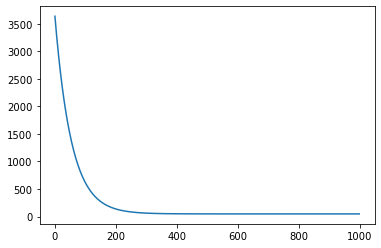

In [27]:
# tracer la progression de la fonction cout en fonction de l'itération
plt.plot(range(1000), cost_history)
plt.show()
# on peut voir que passer 400 itérations la machine ne progresse plus

## 6 COEFFICIENT DE DETERMINATION

In [28]:
# comment évaluer la performance de notre modèle en utilisant le coefficient de détermination
# coef de détermination = R au carré - méthode des moindes carrés
def coefficient_determination(y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [29]:
#  calcul pour y et vecteur prédiction
coefficient_determination(y, predictions)
# 0.95 proche de 1 ==> OK maispeu faire mieux

0.9868617922879617